In [1]:
from toolsWaves import *

In [220]:
mapsizes = ['small','large', 'huge']

In [221]:
#for mapsize in mapsizes:
#    kmax, kmin = findGlobalMinMax(mapsize)
#    print('Mapsize K(max) K(min):'+mapsize, kmax, kmin)

In [235]:
mapsize = mapsizes[1]
yalist, masks, tepoch = get_cc_list(mapsize)
Ts = 50.0
Te = 1.0 
kstart, kend = findIndex(tepoch,Ts, Te)

In [236]:
print(kstart, kend)
kmp = kstart

25 60


In [233]:
%%prun?

In [240]:
%%prun -s cumulative
# ... do something ...
m_L = templateMap(mapsize, masks, kmp)
t_L = tepoch[kmp] 
m_H = templateMap(mapsize, masks, kmp+1) # template for the 2nd map, Leo:too small values 
m_LH = (m_L==1)|(m_H==1)

w_L = kapepoch(m_LH,yalist,kmp, mapsize) # this is the first map     
#w_L = kapepochNew(m_LH,yalist,kmp, mapsize) # this is the first map     

# fill in sub-threshold vals for w_L and w_H from m_LH template 
w_L = fillins(w_L, m_L, m_LH)

# increment map count
kmp = kmp + 1                  
t_H = tepoch[kmp]
w_H = kapepoch(m_LH, yalist, kmp, mapsize)
#w_H = kapepochNew(m_LH, yalist, kmp, mapsize)

In [241]:
%%prun -s cumulative
# ... do something ...
m_L = templateMap(mapsize, masks, kmp)
t_L = tepoch[kmp] 
m_H = templateMap(mapsize, masks, kmp+1) # template for the 2nd map, Leo:too small values 
m_LH = (m_L==1)|(m_H==1)

#w_L = kapepoch(m_LH,yalist,kmp, mapsize) # this is the first map     
w_L = kapepochNew(m_LH,yalist,kmp, mapsize) # this is the first map     

# fill in sub-threshold vals for w_L and w_H from m_LH template 
w_L = fillins(w_L, m_L, m_LH)

# increment map count
kmp = kmp + 1                  
t_H = tepoch[kmp]
#w_H = kapepoch(m_LH, yalist, kmp, mapsize)
w_H = kapepochNew(m_LH, yalist, kmp, mapsize)

In [216]:
def kapepochNew(w_map, yalist, iepoch, mapsize):
    # input iepoch indicates map with name(iepoch)
    # Imports Jody's CC maps, one/time
    # map indexed by iepoch, list of names is in list
    
    ascname = yalist[iepoch]
    kyasuf  = ascname[11:13]     # Kya suffix from asci name
    
    #wj_map=importdata(char(ascname))
    if mapsize is 'small':
        folder='./maps/MAPS100x150/'
        #kmax = 30000
        kmax = 28628.909463
        #wj_map=modules.genfromtxt('/Users/Leo/Desktop/MasterThesis/PopulationDynamics/Code/WesleyCode/mapsimleo/world_100x50.txt',100, 50)
    
    if mapsize is 'large':
        folder='./maps/MAPS360x720/'
        #kmax = 172.2810 #This value was destroying everything
        kmax = 172.280976
        #wj_map=modules.genfromtxt(folder+ascname,720, 360)
        
    if mapsize is 'huge':
        folder='./maps/MAPS720x1440/'
        #kmax = 172.2810 #This value was destroying everything
        kmax = 43.180204 #This value was destroying everything
        #wj_map=modules.genfromtxt(folder+ascname,1440, 720)

    wj_map=genfromtxt(folder+ascname)
    
    #w_cmap = wj_map
    
    rows, cols = wj_map.shape
    
    # 1 pixel shift 
    # Jodys maps are shifted by one pixel: this can change depending on resolution
    # shifting 1 up and one to the left
    wj_map = roll(wj_map,-2,0)
    
    # fill in new pieces of land with threshold or average values of columns 
    w_cmap = fillCCLat(wj_map, w_map)
    """
    ijcnt = 0
    thresh = 5.e-7
    w_cmap=zeros_like(wj_map)
    for row in range(0,rows):
        avelong = 0 
        cnt = 0
        
        for col in range(0,cols): #Scan row 
            if wj_map[row,col]>0:
                avelong = avelong + wj_map[row,col] #sum of values greater than 0 
                cnt = cnt + 1 #number of positive values within a row  

                
        if cnt > 0:
            avelong = avelong/cnt #Average value for a row  
            
        for col in range(0,cols): 
            if w_map[row,col]>0: # mask 
                if wj_map[row,col] > 0: #carrying capacities
                    #copying carrying capacities for land with carrying capacity >0 
                    w_cmap[row,col] = wj_map[row,col]  
                else:
                    if avelong > thresh: #row average greather than threshold 
                        w_cmap[row,col] = avelong #getting a carrying capacity for new land
                        ijcnt = ijcnt + 1 # new land count 
                    else:
                        # average value of carrying capacity less than threshold 
                        w_cmap[row,col] = thresh 
            else:
                w_cmap[row,col] = 0 #Carrying capacity 0 
    """
    if mapsize is 'small':
        #w_cmap = smooth7(NX,NY,w_cmap,w_map);    # quadratic low pass filter
        w_cmap = modules.smooth7(w_cmap,w_map);    # quadratic low pass filter
    
    kap = w_cmap/kmax                       # smoothed, renormalized CC
    
    return kap

In [60]:
import numpy as np 
wj_map=np.identity(10)

In [82]:
%%timeit
rows, cols = wj_map.shape
wtemp=zeros_like(wj_map)

# 1 pixel shift 
# Jodys maps are shifted by one pixel: this can change depending on resolution
for row in range(0,rows):
    rowp1 = row+1
    if rowp1>rows-1: 
        rowp1=0
    for col in range(0,cols):
        colm1 = col-1
        if colm1<0:
            colm1=cols-1

        wtemp[row,col] = wj_map[rowp1,colm1] #problem ip1 =50

10000 loops, best of 3: 46 µs per loop


In [81]:
%%timeit
roll(wj_map,-2,0)

The slowest run took 7.88 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 7.96 µs per loop


In [62]:
#one shift up 
#one shift right
print(wj_map)
print(wtemp)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
[[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [76]:
#print(wj_map)
print(roll(wj_map,-2,0))

[[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [193]:
wj_map=np.random.random((8,4))
w_map = np.random.random((8,4))
wj_map[wj_map>0.4]=0.
w_map[w_map>0.4]=0.

In [194]:
%matplotlib inline
from matplotlib import pyplot as plt 
plt.imshow(wj_map)

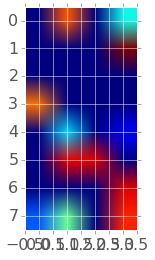

In [195]:
plt.imshow(w_map)

In [211]:
def fillCCLat(wj_map, w_map):
    # fill in new pieces of land with threshold or average values of columns 
    rows, cols = wj_map.shape
    ijcnt = 0
    thresh = 5.e-7
    w_cmap=zeros_like(wj_map)
    for row in range(0,rows):
        meanCC = 0 
        cnt = 0
        for col in range(0,cols): #Scan row 
            if wj_map[row,col]>0:
                meanCC = meanCC + wj_map[row,col] #sum of values greater than 0 
                cnt = cnt + 1 #number of positive values within a row  

        if cnt > 0:
            meanCC = meanCC/cnt #Average value for a row  

        for col in range(0,cols):
            if w_map[row,col]>0: # Piece of land  
                if wj_map[row,col] > 0: #Positive carrying capacity
                    #copying carrying capacities for land with carrying capacity >0 
                    w_cmap[row,col] = wj_map[row,col]  
                else: #Negative carrying capacity
                    if meanCC > thresh: #row average greather than threshold 
                        w_cmap[row,col] = meanCC #getting a carrying capacity for new land
                        ijcnt = ijcnt + 1 # new land count 
                    else:
                        # average value of carrying capacity less than threshold 
                        w_cmap[row,col] = thresh 
            else:
                w_cmap[row,col] = 0 #Carrying capacity 0 
    return w_cmap

In [201]:
def fillCC1(wj_map, w_map):
    # fill in new pieces of land with threshold or average values of columns 
    rows, cols = wj_map.shape
    ijcnt = 0
    thresh = 5.e-7
    w_cmap=zeros_like(wj_map)
    for row in range(0,rows):
        #Take the mean carrying capacity for a given latitude
        w_row=wj_map[row,:]
        meanCC= w_row[w_row>0].mean()

        for col in range(0,cols): 
            if w_map[row,col]>0: # piece of land  
                if wj_map[row,col] > 0: #positive carrying capacities
                    #copying carrying capacities for land with carrying capacity >0 
                    w_cmap[row,col] = wj_map[row,col]  
                else:
                    if meanCC > thresh: #row latitude average is greather than threshold(always true) 
                        w_cmap[row,col] = meanCC #getting a carrying capacity for new land
                        ijcnt = ijcnt + 1 # new land count 
                    else:
                        # average value of carrying capacity less than threshold 
                        w_cmap[row,col] = thresh 
            else:
                w_cmap[row,col] = 0. #Carrying capacity 0             
                
    return w_cmap